In [12]:
import scipy.stats as st
from sympy.solvers import solve
from sympy import Symbol
from scipy.optimize import fsolve
import testjx
import numpy as np
import cvxopt
import cv2
import os 
import random
from sklearn.model_selection import KFold

from sklearn.metrics import fbeta_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from cvxopt import matrix
from cvxopt import solvers
import face_recognition
import sklearn.metrics as sm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
# from scikitplot import plotters as skplt

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC, LinearSVC
import pandas as pd
from sklearn import svm
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from statsmodels.discrete.discrete_model import Logit, Probit, MNLogit
from pylab import mpl

# import warning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score
import matplotlib as mpl
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from collections import Counter
import cv2
import os
import glob
import skimage
import numpy as np
import pandas as pd
import seaborn as sn
import preprocessing
from tqdm import tqdm
from PIL import Image
from os import listdir
import matplotlib.pyplot as plt
from skimage.transform import resize
from collections import Counter
import imblearn
from sklearn.metrics import balanced_accuracy_score
sn.set()
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC # SVC
from sklearn import metrics
from sklearn.utils import shuffle
from xgboost import XGBClassifier # XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,f1_score,recall_score,cohen_kappa_score,precision_score
from sklearn.utils import compute_class_weight
from sklearn.preprocessing import MinMaxScaler,LabelBinarizer
from sklearn.ensemble import AdaBoostClassifier # AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier # KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier # RandomForestClassifier
from sklearn.model_selection import train_test_split
import tensorflow.compat.v1 as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import AUC
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16 # VGG16
from tensorflow.keras.applications.vgg19 import VGG19 # VGG19
from tensorflow.keras.applications.resnet50 import ResNet50 # ResNet50
from tensorflow.keras.applications.xception import Xception # Xception
from tensorflow.keras.applications.mobilenet import MobileNet # MobileNet
from tensorflow.keras.applications.nasnet import NASNetMobile # NASNetMobile
from tensorflow.keras.applications.densenet import DenseNet169 # DenseNet169
from tensorflow.keras.applications.densenet import DenseNet121 # DenseNet121
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2 # MobileNetV2
from tensorflow.keras.applications.inception_v3 import InceptionV3 # InceptionV3
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Flatten, Activation, GlobalAveragePooling2D,Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import fbeta_score
from numpy.linalg import inv,det

# Feature extraction for image data Celeb_6, Celeb_16, Celeb_36



In [9]:
def split(x,y):
    k=int(y.shape[0]/sum(y))-1
    n=y[y==1].shape[0]
    m=int((x.shape[0]-n)/k)
    indice=[i*m for i in range(1,k)]
    indice.append(x.shape[0]-n)
    x_c=np.concatenate((x[y==0],x[y==1]))
    y_c=np.concatenate((np.array([0]*(x.shape[0]-n)),np.array([1]*n)))
    return np.array(np.split(x_c,indice)),np.array(np.split(y_c,indice))

In [5]:
''' Feature extraction---VGG19 network'''
train_6=[]
for i in range(16207):
# for i in range(20000):
    img_ = cv2.imread('/Users/lvjingzhe/Downloads/celebA/trainset_bangs/%d.jpg' %(i))

    train_6.append(img_)
train_image_6=np.array(train_6)
import time
start=time.time()
base_model= VGG19( weights='imagenet', include_top=False,input_shape=(64,64,3))
x = base_model.output
# x = Dropout(0.2)(x)
predictions = Flatten()(x)

model_feat = Model(inputs=base_model.input,outputs=predictions)

train_features = model_feat.predict(train_image_6/255)
# test_features=model_feat.predict(test_image/255)
end=time.time()
print('running time:{}'.format(end-start))

running time:229.15255498886108


In [7]:
'''Split the datatset'''
train_label=np.concatenate((np.array([0]*13766),np.array([1]*2441)))


x_tr_6, x_te_6, y_tr_6, y_te_6 = train_test_split(train_features,train_label,test_size = 0.8,
                                                  shuffle = True,
                                                  random_state = 42)

In [8]:
'''Shuffle the dataset'''
E_6=np.hstack((train_features,train_label.reshape(16207,1)))
np.random.seed(4123)
np.random.shuffle(E_6)
X_sample_6=E_6[:,:-1]
y_sample_6=E_6[:,-1]
X_sample_6.shape

(16207, 2048)

In [10]:
'''Order the dataset for DRM method'''
X_sample_XX_6=np.c_[X_sample_6,np.ones(X_sample_6.shape[0])]
X_train_6=np.c_[x_tr_6,np.ones(x_tr_6.shape[0])]
X_test_6=np.c_[x_te_6,np.ones(x_te_6.shape[0])]
X_sample_ord_6=np.concatenate((X_sample_6[y_sample_6==0],X_sample_6[y_sample_6==1]))
y_sample_ord_6=np.concatenate((y_sample_6[y_sample_6==0],y_sample_6[y_sample_6==1]))

In [22]:
'''model_in symbols the result of traditional logistic regression'''

import time
start_i=time.time()
model_in_6=LogisticRegression()

model_in_6.fit(x_tr_6,y_tr_6)
end_i=time.time()

y_test_proba=model_in_6.predict_proba(x_te_6)

y_test_label=model_in_6.predict(x_te_6)

from sklearn.metrics import classification_report
print(classification_report(y_te_6,y_test_label))
print("Running time:%.2f s"%(end_i-start_i))
from sklearn.metrics import accuracy_score

print('Balanced-Accuracy on testing set：{:.2%}'.format(balanced_accuracy_score(y_te_6,y_test_label)))
print('Recall on testing set：{:.2%}'.format(recall_score(y_te_6,y_test_label)))
print('F-measure on testing set：{:.2%}'.format(fbeta_score(y_te_6,y_test_label,beta=2.94)))
# print(classification_report(y_tr,y_train_label))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     10998
           1       0.76      0.69      0.72      1968

    accuracy                           0.92     12966
   macro avg       0.85      0.83      0.84     12966
weighted avg       0.92      0.92      0.92     12966

Running time:0.62 s
Balanced-Accuracy on testing set：82.64%
Recall on testing set：69.16%
F-measure on testing set：69.82%


In [26]:
''' Partition of fivefold cross-validation'''
cv= RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=0)

In [128]:
'''Define SVMs with different parameters '''
def get_models_svm():
	models, names = list(), list()
	# SVM
	models.append(SVC(probability=True,kernel
                     ='linear'))
	names.append('LinearSVM')
	models.append(SVC(probability=True,kernel
                     ='poly'))
	names.append('PolySVM')
	# Bagging
	# SVM
	models.append(SVC(probability=True))
	names.append('rbfSVM')

	return models, names

In [132]:
'''Define MLPs with different parameters '''
def get_models_mlp():
	models, names = list(), list()
	models.append(MLPClassifier(random_state=0, max_iter=200,hidden_layer_sizes=(20,)))
    
	names.append('MLP_20')

	models.append(MLPClassifier(random_state=0, max_iter=200,hidden_layer_sizes=(50,)))
    
	names.append('MLP_50')
	models.append(MLPClassifier(random_state=0, max_iter=200,hidden_layer_sizes=(100,)))
    
	names.append('MLP_100')
# 	models.append(solution_XX())
# 	names.append('max-mean loss')
	return models, names

In [160]:
'''Define Adaboost with different parameters'''
def get_models_boost():
	models, names = list(), list()

	models.append(AdaBoostClassifier(n_estimators=10,random_state=0))
	names.append('Adaboost_10')
	models.append(AdaBoostClassifier(random_state=0))
	names.append('Adaboost_50')
	models.append(AdaBoostClassifier(n_estimators=100,random_state=0))
	names.append('Adaboost_100')
	return models, names

In [157]:
'''Define Bagging with different parameters '''
def get_models_BAG():
	models, names = list(), list()
	models.append(BaggingClassifier(random_state=0))
	names.append('BAG_10')
	models.append(BaggingClassifier(n_estimators=50,random_state=0))
	names.append('BAG_50')
	models.append(BaggingClassifier(n_estimators=100,random_state=0))
	names.append('BAG-100')

# 	models.append(solution_XX())
# 	names.append('max-mean loss')
	return models, names

In [ ]:
def fivetrials(X,y,k,model,sample='none'):
    pipeline = model
    
    G_m,bacc,fbeta,rec,pre,T=list(),list(),list(),list(),list(),list()
    if sample!='none':

        for train_index,test_index in cv.split(X, y):
        
            start=time.time()
            resample_x,resample_y=sample.fit_resample(X[test_index],y[test_index])
            
            pipeline.fit(resample_x,resample_y)
            end=time.time()
            prdict_y=pipeline.predict(X[train_index])
            prob_y=pipeline.predict_proba(X[train_index])
            rec.append(recall_score(y[train_index],prdict_y))
            G_m.append(np.sqrt(recall_score(y[train_index],prdict_y)*recall_score(y[train_index],prdict_y,pos_label=0)))
            pre.append(precision_score(y[train_index],prdict_y))

            bacc.append(balanced_accuracy_score(y[train_index],prdict_y))
            fbeta.append(fbeta_score(y[train_index],prdict_y,beta=max(2,np.log(k))))
            T.append(end-start)

    else:
        for train_index,test_index in cv.split(X, y):
    
            start=time.time()
            pipeline.fit(X[test_index],y[test_index])
            end=time.time()
            prdict_y=pipeline.predict(X[train_index])
            prob_y=pipeline.predict_proba(X[train_index])
            rec.append(recall_score(y[train_index],prdict_y))
            G_m.append(np.sqrt(recall_score(y[train_index],prdict_y)*recall_score(y[train_index],prdict_y,pos_label=0)))
            pre.append(precision_score(y[train_index],prdict_y))
   
            bacc.append(balanced_accuracy_score(y[train_index],prdict_y))
            fbeta.append(fbeta_score(y[train_index],prdict_y,beta=max(2,np.log(k))))
            T.append(end-start)



    return G_m,bacc,fbeta,rec,pre,T

In [161]:
'''Choose optimal parameters for AdaBoost'''
models, names = get_models_boost()
for i in range(len(models)):
	# evaluate the model and store results
	result_n6 = fivetrials(X_sample_6,y_sample_6,y_sample_6.shape[0]/sum(y_sample_6)-1,models[i],sample=RandomUnderSampler(random_state=0))

	G_mean=result_n6[0]
	Bacc=result_n6[1]
# summarize performance
	recall=result_n6[3]
	Fbeta=result_n6[2]
	T_n6=result_n6[-1]
	acc_s=np.mean(np.array(result_n6)[:4,:],axis=0)
	# summarize and store
	print('>%s: Average G-mean:%.3f(%.3f) ' % ('RUS'+names[i],np.mean(G_mean),np.std(G_mean)))
	print('>%s: Average Balanced_Acc: %.3f(%.3f) ' % ('RUS'+names[i],np.mean(Bacc),np.std(Bacc)))
	print('>%s: Average Fbeta: %.3f(%.3f)' % ('RUS'+names[i],np.mean(Fbeta),np.std(Fbeta)))
	print('>%s: Average Recall: %.3f(%.3f)' % ('RUS'+names[i],np.mean(recall),np.std(recall)))    
	print('>%s: Average Training time: %.3f(%.3f)' % ('RUS'+names[i],np.mean(T_n6),np.std(T_n6)))
	print('>%s: Average accuracy_score: %.3f(%.3f)' % ('RUS'+names[i],np.mean(acc_s),np.std(acc_s)))
	print('>%s: Average Score: %.3f(%.3f)' % ('RUS'+names[i],np.mean(0.99*acc_s+0.01/(np.array(result_n6)[-1,:]/10*9+1)),np.std(0.99*acc_s+0.01/(np.array(result_n6)[-1,:]/10*9+1))))
    

>RUSAdaboost_10: Average G-mean:0.807(0.007) 
>RUSAdaboost_10: Average Balanced_Acc: 0.807(0.007) 
>RUSAdaboost_10: Average Fbeta: 0.684(0.010)
>RUSAdaboost_10: Average Recall: 0.808(0.017)
>RUSAdaboost_10: Average Training time: 0.859(0.100)
>RUSAdaboost_10: Average accuracy_score: 0.777(0.009)
>RUSAdaboost_10: Average Score: 0.774(0.009)
>RUSAdaboost_50: Average G-mean:0.838(0.005) 
>RUSAdaboost_50: Average Balanced_Acc: 0.838(0.005) 
>RUSAdaboost_50: Average Fbeta: 0.728(0.008)
>RUSAdaboost_50: Average Recall: 0.837(0.014)
>RUSAdaboost_50: Average Training time: 3.930(0.081)
>RUSAdaboost_50: Average accuracy_score: 0.810(0.007)
>RUSAdaboost_50: Average Score: 0.804(0.007)
>RUSAdaboost_100: Average G-mean:0.848(0.004) 
>RUSAdaboost_100: Average Balanced_Acc: 0.848(0.004) 
>RUSAdaboost_100: Average Fbeta: 0.743(0.006)
>RUSAdaboost_100: Average Recall: 0.850(0.010)
>RUSAdaboost_100: Average Training time: 7.701(0.272)
>RUSAdaboost_100: Average accuracy_score: 0.822(0.005)
>RUSAdaboost_

In [154]:
'''Parameter selection for Bagging'''
models, names = get_models_BAG()
for i in range(len(models)):
	# evaluate the model and store results
	result_n6 = fivetrials(X_sample_6,y_sample_6,y_sample_6.shape[0]/sum(y_sample_6)-1,models[i],sample=RandomUnderSampler(random_state=0))

	G_mean=result_n6[0]
	Bacc=result_n6[1]
# summarize performance
	recall=result_n6[3]
	Fbeta=result_n6[2]
	T_n6=result_n6[-1]
	acc_s=np.mean(np.array(result_n6)[:4,:],axis=0)
	# summarize and store
	print('>%s: Average G-mean:%.3f(%.3f) ' % ('RUS'+names[i],np.mean(G_mean),np.std(G_mean)))
	print('>%s: Average Balanced_Acc: %.3f(%.3f) ' % ('RUS'+names[i],np.mean(Bacc),np.std(Bacc)))
	print('>%s: Average Fbeta: %.3f(%.3f)' % ('RUS'+names[i],np.mean(Fbeta),np.std(Fbeta)))
	print('>%s: Average Recall: %.3f(%.3f)' % ('RUS'+names[i],np.mean(recall),np.std(recall)))    
	print('>%s: Average Training time: %.3f(%.3f)' % ('RUS'+names[i],np.mean(T_n6),np.std(T_n6)))
	print('>%s: Average accuracy_score: %.3f(%.3f)' % ('RUS'+names[i],np.mean(acc_s),np.std(acc_s)))
	print('>%s: Average Score: %.3f(%.3f)' % ('RUS'+names[i],np.mean(0.99*acc_s+0.01/(np.array(result_n6)[-1,:]/10*9+1)),np.std(0.99*acc_s+0.01/(np.array(result_n6)[-1,:]/10*9+1))))
    

>RUSBAG_10: Average G-mean:0.814(0.004) 
>RUSBAG_10: Average Balanced_Acc: 0.815(0.004) 
>RUSBAG_10: Average Fbeta: 0.693(0.006)
>RUSBAG_10: Average Recall: 0.773(0.011)
>RUSBAG_10: Average Training time: 3.644(0.149)
>RUSBAG_10: Average accuracy_score: 0.774(0.005)
>RUSBAG_10: Average Score: 0.768(0.005)
>RUSBAG_50: Average G-mean:0.844(0.006) 
>RUSBAG_50: Average Balanced_Acc: 0.844(0.006) 
>RUSBAG_50: Average Fbeta: 0.737(0.009)
>RUSBAG_50: Average Recall: 0.832(0.018)
>RUSBAG_50: Average Training time: 17.723(0.569)
>RUSBAG_50: Average accuracy_score: 0.814(0.009)
>RUSBAG_50: Average Score: 0.807(0.009)
>RUSBAG-100: Average G-mean:0.849(0.004) 
>RUSBAG-100: Average Balanced_Acc: 0.849(0.004) 
>RUSBAG-100: Average Fbeta: 0.744(0.006)
>RUSBAG-100: Average Recall: 0.841(0.015)
>RUSBAG-100: Average Training time: 32.980(0.681)
>RUSBAG-100: Average accuracy_score: 0.820(0.007)
>RUSBAG-100: Average Score: 0.813(0.007)


In [133]:
'''Parameter selection for MLP'''
models, names = get_models_mlp()
for i in range(len(models)):
	# evaluate the model and store results
	result_n6 = fivetrials(X_sample_6,y_sample_6,models[i],sample=RandomUnderSampler(random_state=0))

	G_mean=result_n6[0]
	Bacc=result_n6[1]
# summarize performance
	recall=result_n6[3]
	Fbeta=result_n6[2]
	T_n6=result_n6[-1]
	acc_s=np.mean(np.array(result_n6)[:4,:],axis=0)
	# summarize and store
	print('>%s: Average G-mean:%.3f(%.3f) ' % ('RUS'+names[i],np.mean(G_mean),np.std(G_mean)))
	print('>%s: Average Balanced_Acc: %.3f(%.3f) ' % ('RUS'+names[i],np.mean(Bacc),np.std(Bacc)))
	print('>%s: Average Fbeta: %.3f(%.3f)' % ('RUS'+names[i],np.mean(Fbeta),np.std(Fbeta)))
	print('>%s: Average Recall: %.3f(%.3f)' % ('RUS'+names[i],np.mean(recall),np.std(recall)))    
	print('>%s: Average Training time: %.3f(%.3f)' % ('RUS'+names[i],np.mean(T_n6),np.std(T_n6)))
	print('>%s: Average accuracy_score: %.3f(%.3f)' % ('RUS'+names[i],np.mean(acc_s),np.std(acc_s)))
	print('>%s: Average Score: %.3f(%.3f)' % ('RUS'+names[i],np.mean(0.99*acc_s+0.01/(np.array(result_n6)[-1,:]/10*9+1)),np.std(0.99*acc_s+0.01/(np.array(result_n6)[-1,:]/10*9+1))))
    

>RUSMLP_20: Average G-mean:0.871(0.003) 
>RUSMLP_20: Average Balanced_Acc: 0.871(0.003) 
>RUSMLP_20: Average Fbeta: 0.820(0.007)
>RUSMLP_20: Average Recall: 0.868(0.013)
>RUSMLP_20: Average Training time: 2.203(0.342)
>RUSMLP_20: Average accuracy_score: 0.857(0.006)
>RUSMLP_20: Average Score: 0.852(0.006)
>RUSMLP_50: Average G-mean:0.872(0.002) 
>RUSMLP_50: Average Balanced_Acc: 0.872(0.002) 
>RUSMLP_50: Average Fbeta: 0.822(0.005)
>RUSMLP_50: Average Recall: 0.871(0.010)
>RUSMLP_50: Average Training time: 2.738(0.338)
>RUSMLP_50: Average accuracy_score: 0.859(0.004)
>RUSMLP_50: Average Score: 0.853(0.004)
>RUSMLP_100: Average G-mean:0.873(0.003) 
>RUSMLP_100: Average Balanced_Acc: 0.873(0.003) 
>RUSMLP_100: Average Fbeta: 0.823(0.008)
>RUSMLP_100: Average Recall: 0.871(0.013)
>RUSMLP_100: Average Training time: 3.753(0.297)
>RUSMLP_100: Average accuracy_score: 0.860(0.007)
>RUSMLP_100: Average Score: 0.854(0.007)


In [130]:
'''Parameter selection for SVM'''
models, names = get_models_svm()
for i in range(len(models)):
	# evaluate the model and store results
	result_n6 = fivetrials(X_sample_6,y_sample_6,models[i],sample=RandomUnderSampler(random_state=0))

	G_mean=result_n6[0]
	Bacc=result_n6[1]
# summarize performance
	recall=result_n6[3]
	Fbeta=result_n6[2]
	T_n6=result_n6[-1]
	acc_s=np.mean(np.array(result_n6)[:4,:],axis=0)
	# summarize and store
	print('>%s: Average G-mean:%.3f(%.3f) ' % ('RUS'+names[i],np.mean(G_mean),np.std(G_mean)))
	print('>%s: Average Balanced_Acc: %.3f(%.3f) ' % ('RUS'+names[i],np.mean(Bacc),np.std(Bacc)))
	print('>%s: Average Fbeta: %.3f(%.3f)' % ('RUS'+names[i],np.mean(Fbeta),np.std(Fbeta)))
	print('>%s: Average Recall: %.3f(%.3f)' % ('RUS'+names[i],np.mean(recall),np.std(recall)))    
	print('>%s: Average Training time: %.3f(%.3f)' % ('RUS'+names[i],np.mean(T_n6),np.std(T_n6)))
	print('>%s: Average accuracy_score: %.3f(%.3f)' % ('RUS'+names[i],np.mean(acc_s),np.std(acc_s)))
	print('>%s: Average Score: %.3f(%.3f)' % ('RUS'+names[i],np.mean(0.99*acc_s+0.01/(np.array(result_n6)[-1,:]/10*9+1)),np.std(0.99*acc_s+0.01/(np.array(result_n6)[-1,:]/10*9+1))))
    

>RUSLinearSVM: Average G-mean:0.857(0.005) 
>RUSLinearSVM: Average Balanced_Acc: 0.857(0.005) 
>RUSLinearSVM: Average Fbeta: 0.801(0.009)
>RUSLinearSVM: Average Recall: 0.853(0.013)
>RUSLinearSVM: Average Training time: 1.796(0.189)
>RUSLinearSVM: Average accuracy_score: 0.842(0.007)
>RUSLinearSVM: Average Score: 0.837(0.007)
>RUSPolySVM: Average G-mean:0.877(0.001) 
>RUSPolySVM: Average Balanced_Acc: 0.877(0.001) 
>RUSPolySVM: Average Fbeta: 0.827(0.005)
>RUSPolySVM: Average Recall: 0.873(0.011)
>RUSPolySVM: Average Training time: 2.184(0.024)
>RUSPolySVM: Average accuracy_score: 0.864(0.005)
>RUSPolySVM: Average Score: 0.858(0.005)
>RUSrbfSVM: Average G-mean:0.867(0.003) 
>RUSrbfSVM: Average Balanced_Acc: 0.867(0.003) 
>RUSrbfSVM: Average Fbeta: 0.815(0.007)
>RUSrbfSVM: Average Recall: 0.865(0.015)
>RUSrbfSVM: Average Training time: 2.761(0.127)
>RUSrbfSVM: Average accuracy_score: 0.853(0.006)
>RUSrbfSVM: Average Score: 0.848(0.006)


In [150]:
'''Baseline models after parameter selection'''
from sklearn import tree
def get_models_compare(k):
	models, names = list(), list()
	# SVM
	models.append(SVC(probability=True,kernel=k))
	names.append('SVM')

	models.append(AdaBoostClassifier(random_state=0))
	names.append('Adaboost')

	models.append(MLPClassifier(random_state=0, max_iter=200,hidden_layer_sizes=(50,)))
    
	names.append('MLP')
# Bagging
	models.append(BaggingClassifier(n_estimators=50,random_state=0))
	names.append('BAG')

	return models, names

In [142]:
'''We conduct five random trials and report the accuracy and training time '''
import time
def fivetrials_compare(X,y,model,sample='none'):
    pipeline = model
    
    bacc,T=list(),list()
    if sample!='none':

        for train_index,test_index in cv.split(X, y):
        
            start=time.time()
            resample_x,resample_y=sample.fit_resample(X[test_index],y[test_index])
            
            pipeline.fit(resample_x,resample_y)
            end=time.time()
            prdict_y=pipeline.predict(X[train_index])
            prob_y=pipeline.predict_proba(X[train_index])
            
            bacc.append(balanced_accuracy_score(y[train_index],prdict_y))
            T.append(end-start)

    else:
        for train_index,test_index in cv.split(X, y):
    
            start=time.time()
            pipeline.fit(X[test_index],y[test_index])
            end=time.time()
            prdict_y=pipeline.predict(X[train_index])
            prob_y=pipeline.predict_proba(X[train_index])
            
            bacc.append(balanced_accuracy_score(y[train_index],prdict_y))
           
            T.append(end-start)




    return bacc,T

In [169]:
'''Table all_results_6 summarizes the average performances of baseline+sampling classifiers '''
all_results_6=[]
T_compare_6=[]
bacc_compare_6=[]
metrics_names=['B-acc','Train time']
models, names = get_models_compare('poly')
for i in range(len(models)):
# evaluate the model and store results
    result_n6 = fivetrials_compare(X_sample_6,y_sample_6,models[i],sample=RandomUnderSampler(random_state=0))
    metric_res = {'Classifier':'RUS'+names[i]}

    for name, value in zip(metrics_names, np.mean(result_n6,axis=1)):
#             print(name, ': ', value)
            metric_res[name] = value
       

    all_results_6.append(metric_res)

    Bacc=result_n6[0]

    T_n6=result_n6[-1]


    print('>%s: Average Balanced_Acc: %.3f(%.3f) ' % ('RUS'+names[i],np.mean(Bacc),np.std(Bacc)))

    print('>%s: Average Training time: %.3f(%.3f)' % ('RUS'+names[i],np.mean(T_n6),np.std(T_n6)))

result_n6 = fivetrials_compare(X_sample_6,y_sample_6,models[0],sample=SMOTE(random_state=0))
metric_res = {'Classifier':'SMOTE'+names[0]}

for name, value in zip(metrics_names, np.mean(result_n6,axis=1)):

        metric_res[name] = value


all_results_6.append(metric_res)

Bacc=result_n6[0]

T_n6=result_n6[-1]


print('>%s: Average Balanced_Acc: %.3f(%.3f) ' % ('SMOTE'+names[0],np.mean(Bacc),np.std(Bacc)))

print('>%s: Average Training time: %.3f(%.3f)' % ('SMOTE'+names[0],np.mean(T_n6),np.std(T_n6)))

    

>RUSSVM: Average Balanced_Acc: 0.877(0.001) 
>RUSSVM: Average Training time: 2.193(0.119)
>RUSAdaboost: Average Balanced_Acc: 0.838(0.005) 
>RUSAdaboost: Average Training time: 3.722(0.092)
>RUSMLP: Average Balanced_Acc: 0.872(0.002) 
>RUSMLP: Average Training time: 2.552(0.190)
>RUSBAG: Average Balanced_Acc: 0.844(0.006) 
>RUSBAG: Average Training time: 17.171(0.486)
>SMOTESVM: Average Balanced_Acc: 0.881(0.004) 
>SMOTESVM: Average Training time: 49.883(2.036)


In [170]:
pd.DataFrame(all_results_6)

,Classifier,B-acc,Train time
0,RUSSVM,0.877220,2.192732
1,RUSAdaboost,0.837818,3.721677
2,RUSMLP,0.871758,2.552261
3,RUSBAG,0.844068,17.171235
4,SMOTESVM,0.881043,49.882634


In [173]:
pd.DataFrame(all_results_36)

,Classifier,B-acc,Train time
0,RUSSVM,0.962794,0.332750
1,RUSAdaboost,0.946535,1.226062
2,RUSMLP,0.968664,0.433503
3,RUSBAG,0.924168,2.491943
4,SMOTESVM,0.960109,19.965381


In [174]:
pd.DataFrame(all_results_16)

,Classifier,B-acc,Train time
0,RUSSVM,0.859717,0.307451
1,RUSAdaboost,0.831822,1.404027
2,RUSMLP,0.865586,1.043724
3,RUSBAG,0.833697,4.104577
4,SMOTESVM,0.802533,32.842193


In [76]:
''' Class solution_XX() is the algorithm based on Xiaohua,Xuan[2019], the improvement is that
we add a parameter of "penalty".'''
class solution_XX:
    
    
    def __init__(self,penalty = None,Lambda = 0.03,a = 0.5,epochs = 200):
        self.W = None
        self.penalty = penalty
        self.Lambda = Lambda
        self.a = a
        self.epochs =epochs
        self.sigmoid = lambda x:1/(1 + np.exp(-x))


    def f_XX(self,X,Y):
        if self.penalty=='l1':f=np.array([np.mean((self.sigmoid(np.dot(x,self.W))-y)**2 )+self.Lambda*np.sum(np.abs(self.W)) for x,y in zip(X,Y)])
        elif self.penalty=='l2':f=np.array([np.mean((self.sigmoid(np.dot(x,self.W))-y)**2 )+self.Lambda*np.sum(self.W**2) for x,y in zip(X,Y)])#pre_Xtrain,pre_Ytrain
        else:f=np.array([np.mean((self.sigmoid(np.dot(x,self.W))-y)**2 ) for x,y in zip(X,Y)])

        return f         
    def Gf_XX(self,X,Y):#To compute the Derivative matrix, the shape of which is N*2
        if self.penalty=='l1':d=np.array([x.T.dot(0.02*(self.sigmoid(np.dot(x,self.W))-y)*self.sigmoid(np.dot(x,self.W))*(1-self.sigmoid(np.dot(x,self.W))))+self.Lambda*np.sign(self.W )for x,y in zip(X,Y)])
        elif self.penalty=='l2':
            d=np.array([x.T.dot(0.02*(self.sigmoid(np.dot(x,self.W))-y)*self.sigmoid(np.dot(x,self.W))*(1-self.sigmoid(np.dot(x,self.W))))+2*self.Lambda*self.W for x,y in zip(X,Y)])

        else:d=np.array([x.T.dot(0.02*(self.sigmoid(np.dot(x,self.W))-y)*self.sigmoid(np.dot(x,self.W))*(1-self.sigmoid(np.dot(x,self.W)))) for x,y in zip(X,Y)])
        return d
    def direction_XX(self,X,Y):
        gra=self.Gf_XX(X,Y)
        p=matrix(gra.dot(gra.T),tc='d')
        q=matrix(-self.f_XX(X,Y),tc='d')
        G=matrix(np.diag(np.array([-1]*(Y.shape[0]))),tc='d')#N=20
        h=matrix(np.array([[0]]*(Y.shape[0])),tc='d')
        A=matrix([[1.0]]*(Y.shape[0]))
        b=matrix([1.0])
        solvers.options['show_progress'] = False
        sol = solvers.qp(p,q,G,h,A,b)
        t=np.array(sol['x'])
        d= -(gra.T.dot(t))
        return d.reshape((X_sample_XX_6.shape[-1],))

    def fit(self,X,Y):
        
        call=[]
        pre=[]
        loss=[]
        testloss=[]
        np.random.seed(1324)
        self.W=np.random.random((X_sample_XX_6.shape[-1],))*2-1

        
        for k in range(200):

            d=self.direction_XX(X,Y)

            if np.linalg.norm(d)//10**(-7) < 25:
                break
            sigma=0.8
            f_1=np.max(self.f_XX(X,Y))
            w=self.W
            self.W=d*sigma+w
            while np.max(self.f_XX(X,Y))>np.max(f_1):
                sigma=sigma*0.8
                self.W=d*sigma+w
            self.W=d*sigma+w

            
    
        return self.W

In [176]:
'''Return the performances of max-mean loss regression on five random trials'''
def fivetrials_XX_T(X,y,model=solution_XX()):
    pipeline = model
    
    bacc,T=list(),list()
    

    for train_index,test_index in cv.split(X, y):
        
        start=time.time()

        pre_X,pre_Y=split(X[test_index],y[test_index])
#         print(pre_X[0].shape)

        w_x=pipeline.fit(pre_X,pre_Y)
        end=time.time()

        T.append(end-start)
        prdict_y=pipeline.sigmoid(X[train_index].dot(w_x))
        prdict_y[prdict_y>=0.5]=1
        prdict_y[prdict_y<0.5]=0

    
        bacc.append(balanced_accuracy_score(y[train_index],prdict_y))




    return bacc,T

In [177]:
'''Add the result of max-mean loss regression to Table all_results_6'''
result_XX_6= fivetrials_XX_T(X_sample_XX_6,y_sample_6)
Bacc=result_XX_6[0]

T_XX_6=result_XX_6[-1]

print('>%s: Average Balanced_Acc: %.3f(%.3f) ' % ('max_mean loss:',np.mean(Bacc),np.std(Bacc)))

print('>%s: Average Training time: %.3f(%.3f)' % ('max_mean loss:',np.mean(T_XX_6),np.std(T_XX_6)))
metrics_names=['B-acc','Train time']
metric_res = {'Classifier':'max-mean loss'}
for name, value in zip(metrics_names, np.mean(result_XX_6,axis=1)):

        metric_res[name] = value


all_results_6.append(metric_res)



>max_mean loss:: Average Balanced_Acc: 0.850(0.008) 
>max_mean loss:: Average Training time: 2.040(0.230)


In [178]:
pd.DataFrame(all_results_6)

,Classifier,B-acc,Train time
0,RUSSVM,0.877220,2.192732
1,RUSAdaboost,0.837818,3.721677
2,RUSMLP,0.871758,2.552261
3,RUSBAG,0.844068,17.171235
4,SMOTESVM,0.881043,49.882634
5,max-mean loss,0.850231,2.039936


In [82]:
'''DRM(P) algorithm '''
class Poly_close_solution:
    def __init__(self,kernel='self._poly',penalty = None,gamma=1,degree = 2,coef0=0,alpha=1,beta=1):
        self.W = None
        self.penalty = penalty
        self.d = degree
        self.b = coef0
        self.alpha=alpha
        self.beta=beta
        self.g=gamma
        self.kernel=kernel
        
    def _poly(self,X_1,X_2):
        return (self.g*(X_1.dot(X_2.T))+self.b)**self.d
    def _rbf(self,x,y):
        return np.exp(-self.g*np.sum((x[...,None,:]-y)**2,axis=2))

    def poly_B_matrix(self,X,Y):
        n=Y[Y==1].shape[0]
        X_sample_split=np.array(np.split(X,np.array([X.shape[0]-n])))
        B=np.zeros((X.shape[0],X.shape[0]))
        I=0
        for  m in X_sample_split:
            I+=m.shape[0]
            B[I-m.shape[0]:I,I-m.shape[0]:I]=eval(self.kernel+'(m,m)')/m.shape[0]
        return B
    
    def K_x(self,X,x_t):
        return eval(self.kernel+'(X,x_t)')
    
    def QplusBeta(self,X,Y):
        s=time.time()
        K=eval(self.kernel+'(X,X)')
        H_p=np.diag(np.diagonal(K))
        B_p=self.poly_B_matrix(X,Y)
        Qplus_beta=K+self.alpha*(H_p-B_p)+np.diag([self.beta]*X.shape[0])
        e=time.time()
        return K,Qplus_beta
    def fit(self,invQ,X,x_t):
        
        
        W=invQ.dot(self.K_x(X,x_t))##求逆耗时
        
        return W.reshape(-1)
    def delta_phi(self,K,invQ,X,Y,x_t,j):
        
        w=self.fit(invQ,X,x_t)
        w_noty=w

        w_y=np.zeros((X.shape[0]))
        indice=np.argwhere(Y==j).reshape(-1)
        w_noty[indice]=0
        w_y[indice]=w[indice]
        delta=np.dot(w_y,K.dot(w_y))+np.dot(w_noty,K.dot(w_noty))-2*np.dot(w_y,self.K_x(X,x_t))
        return delta
    def predict(self,K,invQ,X,Y,x_t):
        delta=[]
        for k in np.unique(Y):
            delta.append(self.delta_phi(K,invQ,X,Y,x_t,k))
        return np.argmin(delta)

# The following is prediction process of distribution-uncertain methods

In [96]:
def sigmoid_(x,u):
    return 1.0/(1.0+np.exp(-x-u))

In [88]:
def meanuncertainty(x,n):
    r=[]
    for i in range(0,len(x)+1-n,n//10):
        r.append(np.mean(x[i:i+n]))
    return min(r),max(r)

In [89]:
'''Return the max-mean of training error'''
def equa_m(x,n,r):
    pre_in=(np.dot(x_tr,model_in.coef_.T)+model_in.intercept_).reshape(x_tr.shape[0],)
    ini_err=y_tr-sigmoid_(pre_in,x)##ini_err is the predicted err of training set, based on LR

    for k in range(ini_err.shape[0]):
    
        if y_tr[k]==1:
            ini_err[k]=r*ini_err[k]

    
    return meanuncertainty(ini_err,n)[1]
def equa_fivem(x,n,r,Mod,x_train,y_train):
    pre_in=(np.dot(x_train,Mod.coef_.T)+Mod.intercept_).reshape(x_train.shape[0],)
    
    ini_err=y_train-sigmoid_(pre_in,x)##ini_err is the predicted err of training set, based on LR

    for k in range(ini_err.shape[0]):
        if y_train[k]==1:
            ini_err[k]=r*ini_err[k]

    
    return meanuncertainty(ini_err,n)[1]

In [90]:
"""We use 'evaluate_modelxh' to obtain the average performance in 5-fold cross-validation set, for fixed upper mean 'm' """

metrics_names_lr=['Balanced_acc','F2_score','Recall','Precision']
def evaluate_model_lr(X,y,m,model=LogisticRegression()):
    
    bacc,f2,rec,pre=list(),list(),list(),list()
    for train_index,test_index in cv.split(X,y):
#                 X_resampled_smote,y_resampled_smote=SMOTE().fit_resample(X[train_index], y[train_index])
                model.fit(X[train_index],y[train_index])
                prob_y=sigmoid_((np.dot(X[test_index],model.coef_.T)+model.intercept_),m)
                
                
                prdict_y=np.round(prob_y)
                rec.append(recall_score(y[test_index],prdict_y))
                pre.append(precision_score(y[test_index],prdict_y))
                
                bacc.append(balanced_accuracy_score(y[test_index],prdict_y))
                f2.append(fbeta_score(y[test_index],prdict_y,beta=2))
 
    return bacc,f2,rec,pre
    

           
               

In [101]:
'''Return the Average performances of mean-uncertain LR'''
metrics_names_lr=['Balanced_acc','F2_score','Recall','Precision']
def Fivetrails_mean(k,X,y,n,model=LogisticRegression()):##pamrameter n symbols the optimal window_size selected by CV before

    G_m,bacc,f2,rec,pre,T=list(),list(),list(),list(),list(),list()
    for train_index,test_index in cv.split(X,y):
                s_1=time.time()

                model.fit(X[test_index],y[test_index])
                
                mean_u=fsolve(lambda x:equa_fivem(x,n,0.5*(k+1),model,X[test_index],y[test_index]),0.5 )
                t_1=time.time()

                print("optimal upper_mean by CV: %.3f "%(mean_u))
                prob_y=sigmoid_((np.dot(X[train_index],model.coef_.T)+model.intercept_).reshape(X[train_index].shape[0],),mean_u
                             )
                
                
                
                prdict_y=np.round(prob_y)
                print(classification_report(y[train_index],prdict_y))
                rec.append(recall_score(y[train_index],prdict_y))
                pre.append(precision_score(y[train_index],prdict_y))
                G_m.append(np.sqrt(recall_score(y[train_index],prdict_y)*recall_score(y[train_index],prdict_y,pos_label=0)))
                bacc.append(balanced_accuracy_score(y[train_index],prdict_y))
                f2.append(fbeta_score(y[train_index],prdict_y,beta=max(2,np.log(k))))
                T.append(t_1-s_1)
    return G_m,bacc,f2,rec,pre,T

In [108]:
result_6 = Fivetrails_mean(y_sample_6.shape[0]/sum(y_sample_6)-1,X_sample_6,y_sample_6,30)
# 
G_mean=result_6[0]
Bacc=result_6[1]
# summarize performance
recall=result_6[3]
Fbeta=result_6[2]
T_mean_6=result_6[-1]
acc_s=np.mean(np.array(result_6)[:4,:],axis=0)

print('>%s: Average G-mean:%.3f(%.3f) ' % ('LR_mean:',np.mean(G_mean),np.std(G_mean)))
print('>%s: Average Balanced_Acc: %.3f(%.3f) ' % ('LR_mean:',np.mean(Bacc),np.std(Bacc)))
print('>%s: Average Fbeta: %.3f(%.3f)' % ('LR_mean:',np.mean(Fbeta),np.std(Fbeta)))
print('>%s: Average Recall: %.3f(%.3f)' % ('LR_mean:',np.mean(recall),np.std(recall)))
print('>%s: Average Training time: %.3f(%.3f)' % ('LR_mean:',np.mean(T_mean_6),np.std(T_mean_6)))
print('>%s: Average Score: %.3f(%.3f)' % ('LR_mean:',np.mean(0.99*acc_s+0.01/(np.array(result_6)[-1,:]/10*9+1)),np.std(0.99*acc_s+0.01/(np.array(result_6)[-1,:]/10*9+1))))


optimal upper_mean by CV: 3.040 
              precision    recall  f1-score   support

         0.0       0.98      0.86      0.92     11012
         1.0       0.53      0.89      0.67      1953

    accuracy                           0.87     12965
   macro avg       0.75      0.87      0.79     12965
weighted avg       0.91      0.87      0.88     12965

optimal upper_mean by CV: 2.751 
              precision    recall  f1-score   support

         0.0       0.98      0.87      0.92     11013
         1.0       0.55      0.91      0.68      1952

    accuracy                           0.87     12965
   macro avg       0.76      0.89      0.80     12965
weighted avg       0.92      0.87      0.88     12965

optimal upper_mean by CV: 2.726 
              precision    recall  f1-score   support

         0.0       0.98      0.88      0.93     11013
         1.0       0.57      0.89      0.69      1953

    accuracy                           0.88     12966
   macro avg       0.77      

In [191]:
'''Add the result of mean-uncertain LR to all_results_6.'''
metrics_names=['B-acc','Train time']
metric_res = {'Classifier':'LR-mean'}
for name, value in zip(metrics_names, [np.mean(result_6,axis=1)[1],np.mean(result_6,axis=1)[-1]]):
#             print(name, ': ', value)
        metric_res[name] = value


all_results_6.append(metric_res)

In [292]:
df_6=pd.DataFrame(all_results_6)
df_16=pd.DataFrame(all_results_16)
df_36=pd.DataFrame(all_results_36)
df_6['Classifier']=np.append(np.array(df_6['Classifier'].iloc[:-1]),'mean-uncertain LR*')
df_16['Classifier']=np.append(np.array(df_16['Classifier'].iloc[:-1]),'mean-uncertain LR*')
df_36['Classifier']=np.append(np.array(df_36['Classifier'].iloc[:-1]),'mean-uncertain LR*')

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  contains: unknown
  figure: `.Figure`
  fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle or style: {'normal', 'italic', 'oblique'}
  fontvariant or variant: {'normal', 'small-caps'}
  font

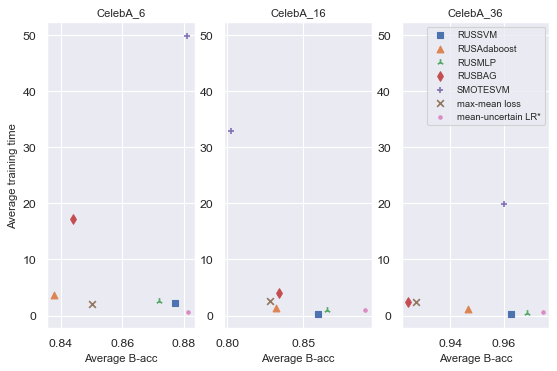

In [298]:
'''Plot the results reported in all_results_6,all_results_16, all_results_36.'''

marker=['s','^','2','d','+','x','.']
fig=plt.figure(figsize=(8,5),dpi=81
              )

ax1=plt.subplot(131)
c1,c2,c3=0,0,0
for i in np.array(df_6):
    
    ax1.scatter(i[1],i[2],label=i[0],marker=marker[c1])
    c1+=1
plt.setp(ax1.get_xticklabels())
plt.xlabel('Average B-acc',fontsize='small')
plt.ylabel('Average training time',fontsize='small')
plt.title('CelebA_6',fontsize='small')
ax2=plt.subplot(132,sharey=ax1)
for i in np.array(df_16):
    ax2.scatter(i[1],i[2],label=i[0],marker=marker[c2])
    c2+=1
plt.xlabel('Average B-acc',fontsize='small')
plt.title('CelebA_16',fontsize='small')
ax3=plt.subplot(133,sharey=ax1)
for i in np.array(df_36):
    ax3.scatter(i[1],i[2],label=i[0],marker=marker[c3])
    c3+=1
plt.xlabel('Average B-acc',fontsize='small')
plt.title('CelebA_36',fontsize='small')
plt.legend(loc='upper right',fontsize='x-small')

In [296]:
df_16

,Classifier,B-acc,Train time
0,RUSSVM,0.859717,0.307451
1,RUSAdaboost,0.831822,1.404027
2,RUSMLP,0.865586,1.043724
3,RUSBAG,0.833697,4.104577
4,SMOTESVM,0.802533,32.842193
5,max-mean loss,0.828053,2.661506
6,mean-uncertain LR*,0.890526,0.916499
